## Importing dataset and splitting Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r"/content/modified_Crop_recommendation.csv")
eval_metrics=[["model","MAE","MSE","RMSE","R2"],0,0,0,0]

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall  label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536      0   
1  85  58  41    21.770462  80.319644  7.038096  226.655537      0   
2  60  55  44    23.004459  82.320763  7.840207  263.964248      0   
3  74  35  40    26.491096  80.158363  6.980401  242.864034      0   
4  78  42  42    20.130175  81.604873  7.628473  262.717340      0   

   soil_moisture  
0      33.474547  
1      33.792242  
2      38.460579  
3      32.714099  
4      31.454324  


In [7]:
print(df.corr())

                      N         P         K  temperature  humidity        ph  \
N              1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P             -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K             -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature    0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity       0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph             0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall       0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   
label          0.282787 -0.167951  0.143703     0.180571  0.524452  0.052389   
soil_moisture -0.011481  0.014241 -0.006659     0.024364 -0.006105 -0.019766   

               rainfall     label  soil_moisture  
N              0.059020  0.282787      -0.011481  
P             -0.063839 -0.167951       0.014241  
K             -0.053461  0.143703      -0.0066

In [8]:


# Import modified dataset


# Split the data into features (X) and target (Y)
X = df.drop('soil_moisture', axis=1)  # drop the soil_moisture column
Y = df['soil_moisture']               # select only the soil_moisture column

# Split the data into training and testing sets for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# View the shape of the training and testing sets


## Support Vector Mechanism

Mean Absolute Error : 3.6497691797399683
Mean Squared Error: 18.350488463029183
Root Mean Squared Error: 4.283747012024541
R-squared: -0.03058576869579177


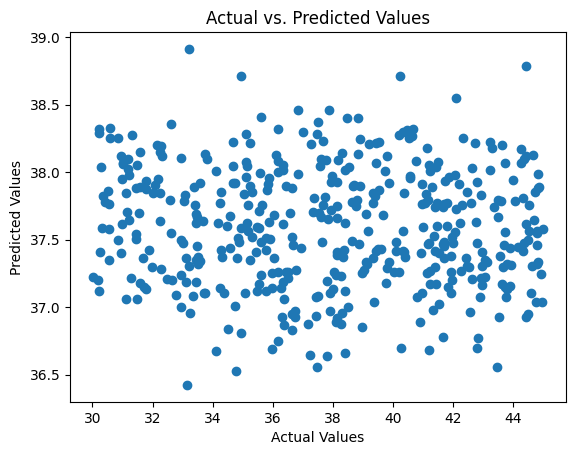

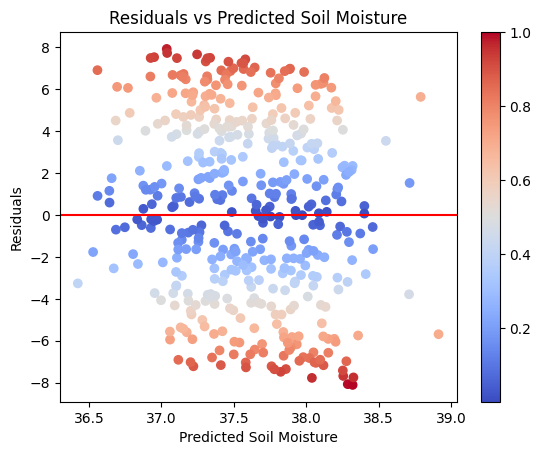

In [9]:
from sklearn.svm import SVR
svm = SVR(kernel="linear")
svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

err=["Support Vector Mechanism",mae,mse,rmse,r2]
eval_metrics[1]=err

plt.scatter(Y_test.values, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Plot the residuals
residuals = Y_test.values - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

## Gradient Boosting Regression

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, Y_train)

# Predict on test set and calculate mean squared error
y_pred = gb.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
err=["Gradient Boosting Regression",mae,mse,rmse,r2]
eval_metrics[2]=err
# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error : 3.6497691797399683
Mean Squared Error: 18.350488463029183
Root Mean Squared Error: 4.283747012024541
R-squared: -0.03058576869579177


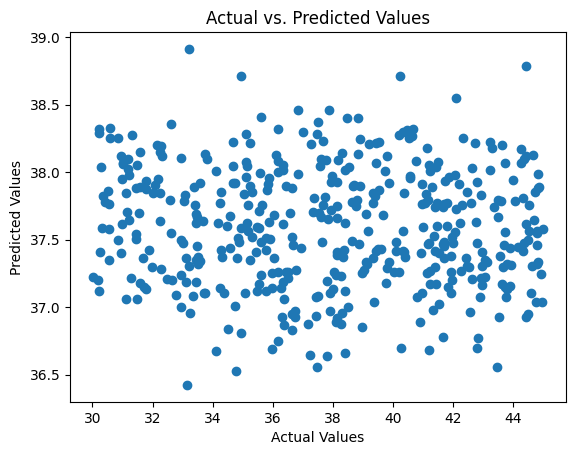

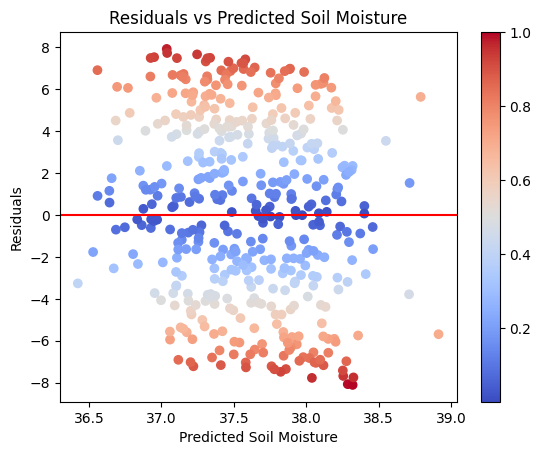

In [12]:
plt.scatter(Y_test.values, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Plot the residuals
residuals = Y_test.values - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

## Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

err=["Random Forest Regression",mae,mse,rmse,r2]
eval_metrics[3]=err

# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error : 3.8012511620688247
Mean Squared Error: 20.18044810149673
Root Mean Squared Error: 4.49226536410047
R-squared: -0.13335852945864257


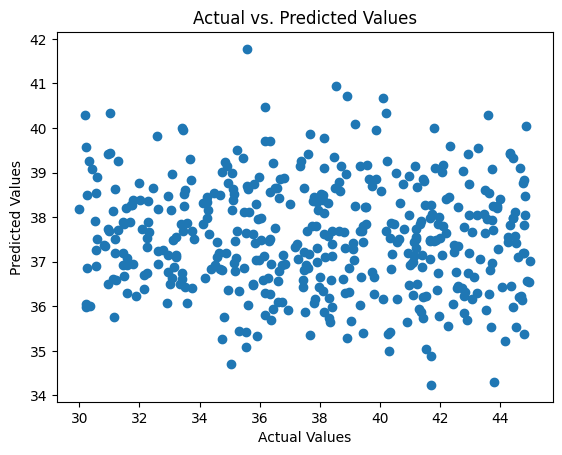

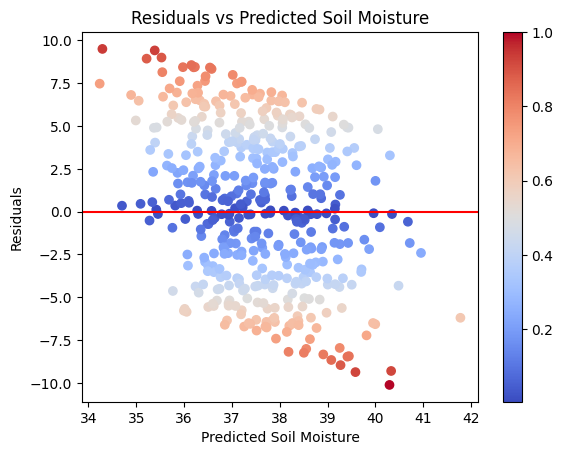

In [14]:
plt.scatter(Y_test.values, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Plot the residuals
residuals = Y_test.values - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

## Feedforward Neural Network

In [17]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import keras
from keras.optimizers import Adam

adam = Adam(learning_rate=10**-6, decay=10**-9)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Y_train_scaled = scaler.fit_transform(np.array(Y_train).reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(np.array(Y_test).reshape(-1, 1))

# Build the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=adam)


# Train the model
history = model.fit(X_train_scaled, Y_train_scaled,
                    epochs=100 0,
                    batch_size=16,
                    validation_data=(X_test_scaled, Y_test_scaled),
                    verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.5534 - val_loss: 1.5917
Epoch 2/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6181 - val_loss: 1.5878
Epoch 3/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5905 - val_loss: 1.5839
Epoch 4/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5574 - val_loss: 1.5800
Epoch 5/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5004 - val_loss: 1.5761
Epoch 6/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6649 - val_loss: 1.5723
Epoch 7/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5233 - val_loss: 1.5685
Epoch 8/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6175 - val_loss: 1.5647
Epoch 9/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5912 - val_loss: 1.5609
Epoch 10/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5512 - val_loss: 1.5572
Epoch 11/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5433 - val_loss: 1.5535
Epoch 12/1000
110/110 ━━━━━━━━

In [18]:
# from tensorflow.keras.models import load_model

# # Load the entire model from a HDF5 file
# model = load_model('/kaggle/working/FNN.h5')

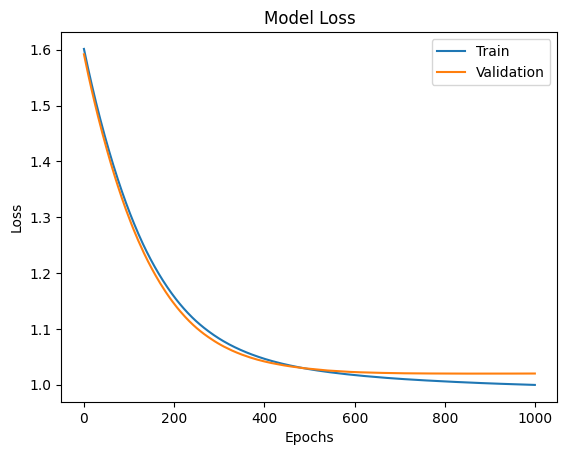

In [19]:
history.params
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:
score = model.evaluate(X_test_scaled, Y_test_scaled, verbose=0)
print('Test loss:', score)
Y_pred = model.predict(X_test_scaled)
# print('Predictions:', predictions)

mae = mean_absolute_error(Y_test_scaled, Y_pred)
mse = mean_squared_error(Y_test_scaled, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_scaled, Y_pred)

err=["Feedforward Neural Network",mae,mse,rmse,r2]
eval_metrics[4]=err

# Print the evaluation metrics
print('Mean Absolute Error :', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Test loss: 1.0199569463729858
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error : 0.8594417173657681
Mean Squared Error: 1.0199569925448135
Root Mean Squared Error: 1.0099292017487234
R-squared: -0.019956992544813534


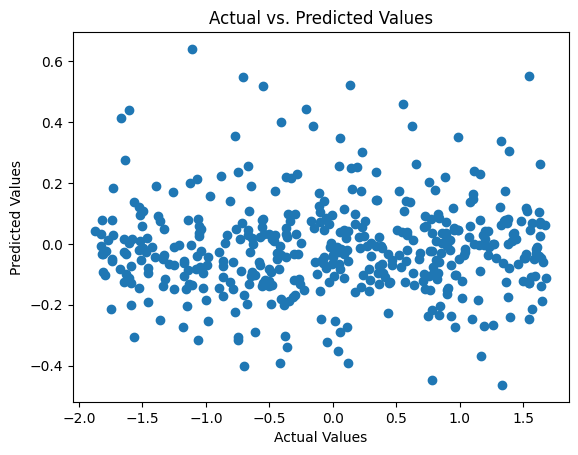

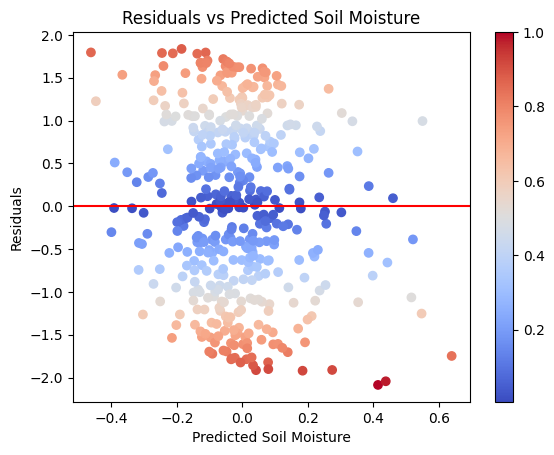

In [21]:
plt.scatter(Y_test_scaled, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

residuals = Y_test_scaled - Y_pred
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=np.abs(residuals).max())
plt.scatter(Y_pred, residuals, c=norm(np.abs(residuals)), cmap=cmap)
plt.xlabel('Predicted Soil Moisture')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Soil Moisture')
plt.axhline(y=0, color='r', linestyle='-') # add a horizontal line at y=0
plt.colorbar() # add a colorbar to show shading scale
plt.show()

In [22]:
from tabulate import tabulate
print(tabulate(eval_metrics,headers="firstrow"))

model                              MAE       MSE     RMSE          R2
----------------------------  --------  --------  -------  ----------
Support Vector Mechanism      3.64977   18.3505   4.28375  -0.0305858
Gradient Boosting Regression  3.64977   18.3505   4.28375  -0.0305858
Random Forest Regression      3.80125   20.1804   4.49227  -0.133359
Feedforward Neural Network    0.859442   1.01996  1.00993  -0.019957


## Firebase Connect